# Parameter Estimation
## Example
In a certain city, there are exacly **n** trains serving the whole city. Each train has a unique number from 1..n. We observe 20 trains and write down their numbers. How many trains are there in total (n)?

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We observe the following trains in the following order: 
[ 4  9  5  6  7  4 13  8  1  9  8  1 14  5  4 12  3  1 14  2  6  2  2  1
  9  4 12 11  7 12]
Our believes about n - for each new train we see - are updated as follows: 
[0, 4, 9, 9, 9, 9, 9, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


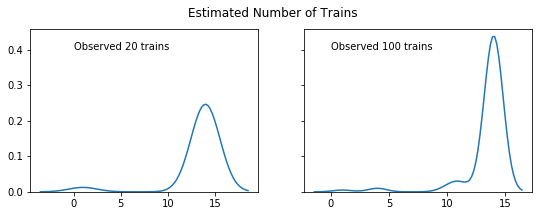

In [50]:
seen_20 = np.random.randint(1,15, 20)
seen_100 = np.random.randint(1,15, 100)
print(f"We observe the following trains in the following order: \n{seen}")

def estimate_n_given_observed_data(observed_data):
    ns = [1]
    for s in observed_data:
        # n must be at least as big as the biggest number seen until now
        # if a seen number is smaller than n, we keep our previous believe
        ns.append(s if s > ns[-1] else ns[-1])
    return ns

ns_20 = estimate_n_given_observed_data(seen_20)
ns_100 = estimate_n_given_observed_data(seen_100)
print(f"Our believes about n - for each new train we see - are updated as follows: \n{ns}")

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9,3))
sns.kdeplot(ns_20, ax=ax[0])
ax[0].annotate("Observed 20 trains", (0, 0.4))
sns.kdeplot(ns_100, ax=ax[1])
ax[1].annotate("Observed 100 trains", (0, 0.4))
fig.suptitle("Estimated Number of Trains")
plt.show()

We start by assuming that there is only one single train. If we see a train with a number higher than the current estimate, we need to update the estimate to the seen number. If our current estimate is $n=6$ and we see train number 20, we need to update n to 20 because $n=20$ would be the n that maximizes the likelihood of seeing the observed data (Maximum Likelihood Estimation). If we see a train with a number lower than the current n, we stay at our previous estimate, as this is the maximum likelihood n. If our estimate, in this case, is $n=20$ and we see train number 8 the estimate stays at 20 because (1) it cannot be lower than 20 and (2) increasing it would **decrease** the likelihood of observing the data.